# Import packages and loading the data

In [242]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.metrics import log_loss
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import datasets, linear_model
from sklearn.metrics import confusion_matrix

# Part 2. Regression
---------------------------

# 1. Real dataset

In [243]:
# Load the diabetes dataset
#https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html#sklearn.datasets.load_diabetes
data= datasets.load_diabetes()

In [244]:
X = data['data']
y = data['target']

In [245]:
# Use only one feature
#https://numpy.org/doc/stable/reference/constants.html#numpy.newaxis
X = X[:, np.newaxis, 2]

# Split the data into training/testing sets
X_train = X[:-20]
X_test = X[-20:]

# Split the targets into training/testing sets
y_train = y[:-20]
y_test = y[-20:]

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(422, 1)
(422,)
(20, 1)
(20,)


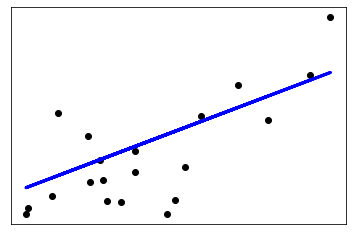

In [246]:
plt.scatter(X_test, y_test, color="black")
plt.plot(X_test, y_pred, color="blue", linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

## Building the neural network

In [247]:
def linear(X):
    return X

class NeuralNetwork:
    
    def __init__(self, lr, max_iter, random_state=None):
        self.lr = lr
        self.max_iter =  max_iter
        self.random_state = random_state

    def fit(self, X, y):
        y = y.reshape(-1, 1)

        if self.random_state:
            np.random.seed(self.random_state)

        self.W1 = np.random.rand(1, 10)
        self.b1 = np.random.rand(10)
        self.W2 = np.random.rand(10, 1)
        self.b2 = np.random.rand(1)

        loss_history = []

        for i in range(self.max_iter):
            Z1 = np.dot(X, self.W1) + self.b1
            A1 = linear(Z1)
        
            Z2 = np.dot(A1, self.W2) + self.b2
            y_pred = linear(Z2)

            loss = np.mean((y_pred - y)**2)
            loss_history.append(loss)   

            e = (y_pred - y)

            dW2 = np.dot(A1.T, e)
            db2 = np.sum(e)

            dW1 = np.dot(X.T, np.dot(e, self.W2.T))
            db1 = np.sum(np.dot(e, self.W2.T), axis = 0)

            self.W1 = self.W1 - self.lr * dW1
            self.b1 = self.b1 - self.lr * db1
            self.W2 = self.W2 - self.lr * dW2
            self.b2 = self.b2 - self.lr * db2

        return loss_history

    def predict(self, X_test):
        y_test_pred = (self.predict_proba(X_test) > 0.5).astype(int)
        return y_test_pred
    
    def predict_proba(self, X_test):
        Z1 = np.dot(X_test, self.W1) + self.b1
        A1 = linear(Z1)
        
        Z2 = np.dot(A1, self.W2) + self.b2
        A2 = linear(Z2)

        return A2

In [248]:
network = NeuralNetwork(0.0001, 1000, 6850)
loss_list = network.fit(X_test, y_test) 

In [249]:
test_preds = network.predict(X_train)
print(confusion_matrix(y_train, test_preds))

[[0 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]]


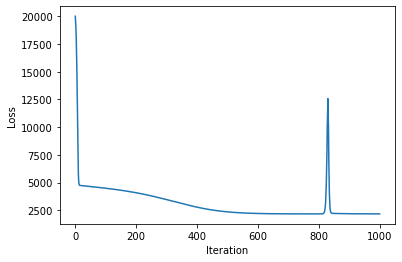

In [250]:
plt.plot(loss_list)
plt.xlabel('Iteration')
plt.ylabel('Loss')

plt.show()

## 1.1 Scalling - Minmax scaler

In [251]:
from sklearn.preprocessing import MinMaxScaler
scaler_1 = MinMaxScaler()

In [252]:
scaled_1 = pd.DataFrame(X_train)
scaled_1
X_1= scaler_1.fit_transform(X_train)
print(X_1.shape)

(422, 1)


In [253]:
scaled_11 = pd.DataFrame(X_test)
scaled_11
X_11= scaler_1.fit_transform(X_test)
print(X_11.shape)

(20, 1)


## Building the neural network

In [254]:
def linear(X):
    return X

class NeuralNetwork:
    
    def __init__(self, lr, max_iter, random_state=None):
        self.lr = lr
        self.max_iter =  max_iter
        self.random_state = random_state

    def fit(self, X_1, y_train):
        y_train = y_train.reshape(-1, 1)

        if self.random_state:
            np.random.seed(self.random_state)

        self.W1 = np.random.rand(1, 10)
        self.b1 = np.random.rand(10)
        self.W2 = np.random.rand(10, 1)
        self.b2 = np.random.rand(1)

        loss_history = []

        for i in range(self.max_iter):
            Z1 = np.dot(X_1, self.W1) + self.b1
            A1 = linear(Z1)
        
            Z2 = np.dot(A1, self.W2) + self.b2
            y_train_pred = linear(Z2)

            loss = np.mean((y_train_pred - y_train)**2)
            loss_history.append(loss)   

            e = (y_train_pred - y_train)

            dW2 = np.dot(A1.T, e)
            db2 = np.sum(e)

            dW1 = np.dot(X_1.T, np.dot(e, self.W2.T))
            db1 = np.sum(np.dot(e, self.W2.T), axis = 0)

            self.W1 = self.W1 - self.lr * dW1
            self.b1 = self.b1 - self.lr * db1
            self.W2 = self.W2 - self.lr * dW2
            self.b2 = self.b2 - self.lr * db2

        return loss_history

    def predict(self, X_11):
        y_test_pred = (self.predict_proba(X_11) > 0.5).astype(int)
        return y_test_pred
    
    def predict_proba(self, X_11):
        Z1 = np.dot(X_11, self.W1) + self.b1
        A1 = linear(Z1)
        
        Z2 = np.dot(A1, self.W2) + self.b2
        A2 = linear(Z2)

        return A2

In [255]:
network = NeuralNetwork(0.0001, 1000, 6850)
loss_list = network.fit(X_11, y_test) 

In [256]:
test_preds = network.predict(X_11)
print(confusion_matrix(y_test, test_preds))

[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]


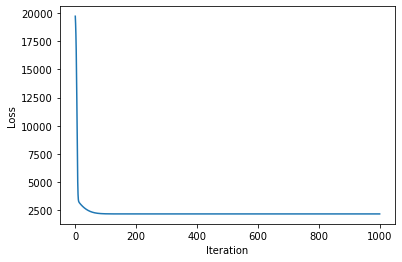

In [257]:
plt.plot(loss_list)
plt.xlabel('Iteration')
plt.ylabel('Loss')

plt.show()

## 1.2 Standardization

In [258]:
from sklearn.preprocessing import StandardScaler
#from sklearn import preprocessing
scaler_2 = StandardScaler()

In [259]:
scaled_2 = pd.DataFrame(X_train)
scaled_2
X_2= scaler_2.fit_transform(X_train)
print(X_2.shape)

(422, 1)


In [260]:
scaled_22 = pd.DataFrame(X_test)
scaled_22
X_22= scaler_2.fit_transform(X_test)
print(X_22.shape)

(20, 1)


## Building the neural network

In [261]:
def linear(X):
    return X

class NeuralNetwork:
    
    def __init__(self, lr, max_iter, random_state=None):
        self.lr = lr
        self.max_iter =  max_iter
        self.random_state = random_state

    def fit(self, X_2, y_train):
        y_train = y_train.reshape(-1, 1)

        if self.random_state:
            np.random.seed(self.random_state)

        self.W1 = np.random.rand(1, 10)
        self.b1 = np.random.rand(10)
        self.W2 = np.random.rand(10, 1)
        self.b2 = np.random.rand(1)

        loss_history = []

        for i in range(self.max_iter):
            Z1 = np.dot(X_2, self.W1) + self.b1
            A1 = linear(Z1)
        
            Z2 = np.dot(A1, self.W2) + self.b2
            y_train_pred = linear(Z2)

            loss = np.mean((y_train_pred - y_train)**2)
            loss_history.append(loss)   

            e = (y_train_pred - y_train)

            dW2 = np.dot(A1.T, e)
            db2 = np.sum(e)

            dW1 = np.dot(X_2.T, np.dot(e, self.W2.T))
            db1 = np.sum(np.dot(e, self.W2.T), axis = 0)

            self.W1 = self.W1 - self.lr * dW1
            self.b1 = self.b1 - self.lr * db1
            self.W2 = self.W2 - self.lr * dW2
            self.b2 = self.b2 - self.lr * db2

        return loss_history

    def predict(self, X_22):
        y_test_pred = (self.predict_proba(X_22) > 0.5).astype(int)
        return y_test_pred
    
    def predict_proba(self, X_22):
        Z1 = np.dot(X_22, self.W1) + self.b1
        A1 = linear(Z1)
        
        Z2 = np.dot(A1, self.W2) + self.b2
        A2 = linear(Z2)

        return A2

In [262]:
network = NeuralNetwork(0.0001, 1000, 6850)
loss_list = network.fit(X_22, y_test) 

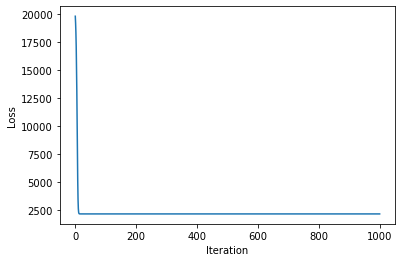

In [263]:
plt.plot(loss_list)
plt.xlabel('Iteration')
plt.ylabel('Loss')

plt.show()

## 1.3 Decorrelation

In [267]:
from sklearn.decomposition import PCA
model = PCA()

X_3 = model.fit_transform(X_train)
X_3

X_33 = model.fit_transform(X_test)
X_33

array([[ 0.08784168],
       [-0.02963983],
       [ 0.02101734],
       [-0.03071764],
       [-0.02425077],
       [ 0.01562828],
       [ 0.0986198 ],
       [-0.02317296],
       [-0.04688483],
       [-0.02101734],
       [ 0.06520763],
       [-0.05011826],
       [ 0.01131703],
       [-0.01347265],
       [-0.06412982],
       [ 0.02963983],
       [-0.00592797],
       [-0.00592797],
       [ 0.04904045],
       [-0.06305201]])

## Building the neural network

In [268]:
def linear(X):
    return X

class NeuralNetwork:
    
    def __init__(self, lr, max_iter, random_state=None):
        self.lr = lr
        self.max_iter =  max_iter
        self.random_state = random_state

    def fit(self, X_3, y_train):
        y_train = y_train.reshape(-1, 1)

        if self.random_state:
            np.random.seed(self.random_state)

        self.W1 = np.random.rand(1, 10)
        self.b1 = np.random.rand(10)
        self.W2 = np.random.rand(10, 1)
        self.b2 = np.random.rand(1)

        loss_history = []

        for i in range(self.max_iter):
            Z1 = np.dot(X_3, self.W1) + self.b1
            A1 = linear(Z1)
        
            Z2 = np.dot(A1, self.W2) + self.b2
            y_train_pred = linear(Z2)

            loss = np.mean((y_train_pred - y_train)**2)
            loss_history.append(loss)   

            e = (y_train_pred - y_train)

            dW2 = np.dot(A1.T, e)
            db2 = np.sum(e)

            dW1 = np.dot(X_3.T, np.dot(e, self.W2.T))
            db1 = np.sum(np.dot(e, self.W2.T), axis = 0)

            self.W1 = self.W1 - self.lr * dW1
            self.b1 = self.b1 - self.lr * db1
            self.W2 = self.W2 - self.lr * dW2
            self.b2 = self.b2 - self.lr * db2

        return loss_history

    def predict(self, X_33):
        y_test_pred = (self.predict_proba(X_33) > 0.5).astype(int)
        return y_test_pred
    
    def predict_proba(self, X_33):
        Z1 = np.dot(X_33, self.W1) + self.b1
        A1 = linear(Z1)
        
        Z2 = np.dot(A1, self.W2) + self.b2
        A2 = linear(Z2)

        return A2

In [269]:
network = NeuralNetwork(0.0001, 1000, 6850)
loss_list = network.fit(X_33, y_test) 

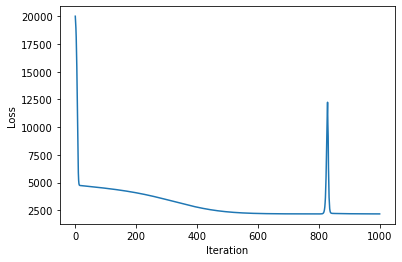

In [270]:
plt.plot(loss_list)
plt.xlabel('Iteration')
plt.ylabel('Loss')

plt.show()

## 1.4 Log-transformation

In [271]:
from sklearn.preprocessing import FunctionTransformer
transformer = FunctionTransformer(np.log1p)
X_4 = transformer.transform(X_train)
X_4

X_44 = transformer.transform(X_test)
X_44

array([[ 0.07498074],
       [-0.04042429],
       [ 0.01097855],
       [-0.0415472 ],
       [-0.0348286 ],
       [ 0.00563408],
       [ 0.0849306 ],
       [-0.03371321],
       [-0.05854385],
       [-0.03148616],
       [ 0.05375812],
       [-0.06197813],
       [ 0.00133784],
       [-0.0237303 ],
       [-0.07699781],
       [ 0.01947074],
       [-0.01603413],
       [-0.01603413],
       [ 0.03831853],
       [-0.0758344 ]])

## Building the neural network

In [272]:
def linear(X):
    return X

class NeuralNetwork:
    
    def __init__(self, lr, max_iter, random_state=None):
        self.lr = lr
        self.max_iter =  max_iter
        self.random_state = random_state

    def fit(self, X_4, y_train):
        y_train = y_train.reshape(-1, 1)

        if self.random_state:
            np.random.seed(self.random_state)

        self.W1 = np.random.rand(1, 10)
        self.b1 = np.random.rand(10)
        self.W2 = np.random.rand(10, 1)
        self.b2 = np.random.rand(1)

        loss_history = []

        for i in range(self.max_iter):
            Z1 = np.dot(X_4, self.W1) + self.b1
            A1 = linear(Z1)
        
            Z2 = np.dot(A1, self.W2) + self.b2
            y_train_pred = linear(Z2)

            loss = np.mean((y_train_pred - y_train)**2)
            loss_history.append(loss)   

            e = (y_train_pred - y_train)

            dW2 = np.dot(A1.T, e)
            db2 = np.sum(e)

            dW1 = np.dot(X_4.T, np.dot(e, self.W2.T))
            db1 = np.sum(np.dot(e, self.W2.T), axis = 0)

            self.W1 = self.W1 - self.lr * dW1
            self.b1 = self.b1 - self.lr * db1
            self.W2 = self.W2 - self.lr * dW2
            self.b2 = self.b2 - self.lr * db2

        return loss_history

    def predict(self, X_44):
        y_test_pred = (self.predict_proba(X_44) > 0.5).astype(int)
        return y_test_pred
    
    def predict_proba(self, X_44):
        Z1 = np.dot(X_44, self.W1) + self.b1
        A1 = linear(Z1)
        
        Z2 = np.dot(A1, self.W2) + self.b2
        A2 = linear(Z2)

        return A2

In [273]:
network = NeuralNetwork(0.0001, 1000, 6850)
loss_list = network.fit(X_44, y_test) 

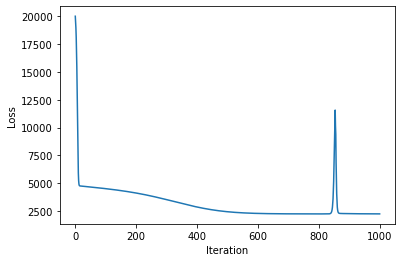

In [274]:
plt.plot(loss_list)
plt.xlabel('Iteration')
plt.ylabel('Loss')

plt.show()

# 2. Synthetic dataset

In [388]:
import numpy as np
from sklearn.linear_model import LinearRegression

In [400]:
x = np.array([54389, 15472, 24386, 3436723, 454274, 534245]).reshape((-1, 1))
y = np.array([53478, 28493, 14449, 3438294, 243289, 343829])

In [401]:
model = LinearRegression()

In [402]:
model.fit(x, y)

LinearRegression()

In [403]:
r_sq = model.score(x, y)
print('coefficient of determination:', r_sq)

coefficient of determination: 0.9941780112500619


In [404]:
print('intercept:', model.intercept_)
print('slope:', model.coef_)

intercept: -75352.47354258713
slope: [1.01204956]


In [405]:
y_pred = model.predict(x)
print('predicted response:', y_pred, sep='\n')

predicted response:
[ -20308.11017561  -59694.04279347  -50672.63304052 3402781.51685328
  384395.32700843  465329.94214789]


In [406]:
y_pred = model.intercept_ + model.coef_ * x
print('predicted response:', y_pred, sep='\n')

predicted response:
[[ -20308.11017561]
 [ -59694.04279347]
 [ -50672.63304052]
 [3402781.51685328]
 [ 384395.32700843]
 [ 465329.94214789]]


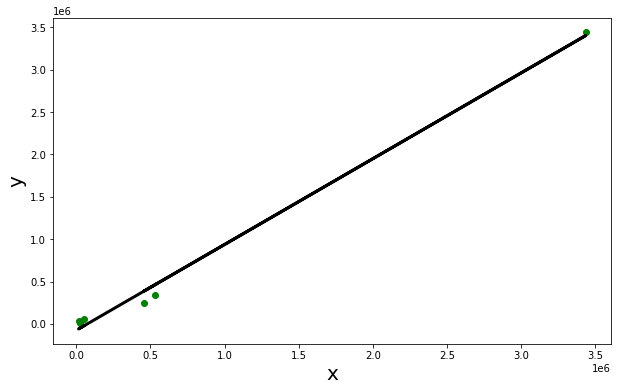

In [407]:
#Plotting the results
plt.figure(figsize = (10,6))
plt.scatter(x ,y , color = 'green')
plt.plot(x, y_pred , color = 'k' , lw = 3)
plt.xlabel('x' , size = 20)
plt.ylabel('y', size = 20)
plt.show()

## Building the neural network

In [408]:
def linear(X):
    return X

class NeuralNetwork:
    
    def __init__(self, lr, max_iter, random_state=None):
        self.lr = lr
        self.max_iter =  max_iter
        self.random_state = random_state

    def fit(self, x, y):
        y = y.reshape(-1, 1)

        if self.random_state:
            np.random.seed(self.random_state)

        self.W1 = np.random.rand(1, 10)
        self.b1 = np.random.rand(10)
        self.W2 = np.random.rand(10, 1)
        self.b2 = np.random.rand(1)

        loss_history = []

        for i in range(self.max_iter):
            Z1 = np.dot(x, self.W1) + self.b1
            A1 = linear(Z1)
        
            Z2 = np.dot(A1, self.W2) + self.b2
            y_pred = linear(Z2)

            loss = np.mean((y_pred - y)**2)
            loss_history.append(loss)   

            e = (y_pred - y)

            dW2 = np.dot(A1.T, e)
            db2 = np.sum(e)

            dW1 = np.dot(x.T, np.dot(e, self.W2.T))
            db1 = np.sum(np.dot(e, self.W2.T), axis = 0)

            self.W1 = self.W1 - self.lr * dW1
            self.b1 = self.b1 - self.lr * db1
            self.W2 = self.W2 - self.lr * dW2
            self.b2 = self.b2 - self.lr * db2

        return loss_history

    def predict(self, x):
        y_pred = (self.predict_proba(x) > 0.5).astype(int)
        return y_pred
    
    def predict_proba(self, x):
        Z1 = np.dot(x, self.W1) + self.b1
        A1 = linear(Z1)
        
        Z2 = np.dot(A1, self.W2) + self.b2
        A2 = linear(Z2)

        return A2

In [409]:
network = NeuralNetwork(0.01, 100, 68)
loss_list = network.fit(x, y) 

<ipython-input-408-7dbdd9943af6>:31: RuntimeWarning: overflow encountered in square
  loss = np.mean((y_pred - y)**2)
<ipython-input-408-7dbdd9943af6>:42: RuntimeWarning: invalid value encountered in subtract
  self.W1 = self.W1 - self.lr * dW1
<ipython-input-408-7dbdd9943af6>:43: RuntimeWarning: invalid value encountered in subtract
  self.b1 = self.b1 - self.lr * db1
<ipython-input-408-7dbdd9943af6>:44: RuntimeWarning: invalid value encountered in subtract
  self.W2 = self.W2 - self.lr * dW2


In [410]:
test_preds = network.predict(x)
print(confusion_matrix(y, test_preds))

[[0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0]
 [1 0 0 0 0 0 0]
 [1 0 0 0 0 0 0]
 [1 0 0 0 0 0 0]
 [1 0 0 0 0 0 0]
 [1 0 0 0 0 0 0]]


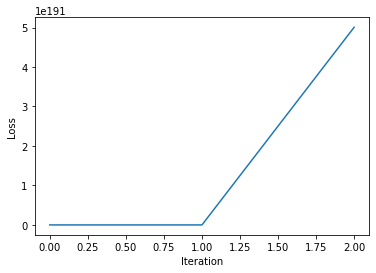

In [411]:
plt.plot(loss_list)
plt.xlabel('Iteration')
plt.ylabel('Loss')

plt.show()

## 2.1 Scalling - Minmax scaler

In [412]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(x)

MinMaxScaler()

print(scaler.transform(x))

[[0.01137508]
 [0.        ]
 [0.00260548]
 [1.        ]
 [0.12825776]
 [0.15163255]]


## Building the neural network

In [419]:
def linear(X):
    return X

def linear_derivative(X):
    return 1

class NeuralNetwork:
    def __init__(self, x, y):
        self.input = x
        self.y = y
        self.output = np.zeros(self.y.shape)
        
        #initialize weights
        self.weights1 = ([0.5],[0.5],[0.5],[0.5],[0.5],[0.5])
        self.weights2 = (([0.5, 0.5, 0.5, 0.5, 0.5, 0.5])

        #record the error of each epoch
        self.error_history = []
        self.epoch_list = []

    def feedforward(self):
        self.layer1 = np.dot(self.input, self.weights1)
        self.output = np.dot(self.layer1, self.weights2)

    def backprop(self):
        # application of the chain rule to find derivative of the loss function with respect to weights2 and weights1
        d_weights2 = np.dot(self.layer1.T, (2*(self.y - self.output) * linear_derivative(self.output)))
        d_weights1 = np.dot(self.input.T, (np.dot(2*(self.y - self.output) * linear_derivative(self.output), self.weights2.T) * sigmoid_derivative(self.layer1)))

        # update the weights with the derivative (slope) of the loss function
        self.weights1 += d_weights1
        self.weights2 += d_weights2
    
    #train the nn for 3000 iterations
    def train(self,epoch = 3000):
        for epoch in range (epoch):
            self.feedforward()
            self.backprop()
            
            #keep track of the error history over each epoch
            self.error_history.append(np.average(np.abs(self.y - self.output)))
            self.epoch_list.append(epoch)
            
            
nn = NeuralNetwork(x,y)
nn.train()

print(nn.output)
    
#plot the error over the entire training duration
plt.figure(figsize = (15,6))
plt.plot(nn.epoch_list, nn.error_history)
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.show()

SyntaxError: invalid syntax (<ipython-input-419-7881d228313c>, line 18)

In [372]:
def linear(X):
    return X

class NeuralNetwork:
    
    def __init__(self, lr, max_iter, random_state=None):
        self.lr = lr
        self.max_iter =  max_iter
        self.random_state = random_state

    def fit(self, x, y):
        y = y.reshape(-1, 1)

        if self.random_state:
            np.random.seed(self.random_state)

        self.W1 = np.random.rand(1, 10)
        self.b1 = np.random.rand(10)
        self.W2 = np.random.rand(10, 1)
        self.b2 = np.random.rand(1)

        loss_history = []

        for i in range(self.max_iter):
            Z1 = np.dot(x, self.W1) + self.b1
            A1 = linear(Z1)
        
            Z2 = np.dot(A1, self.W2) + self.b2
            y_pred = linear(Z2)

            loss = np.mean((y_pred - y)**2)
            loss_history.append(loss)   

            e = (y_pred - y)

            dW2 = np.dot(A1.T, e)
            db2 = np.sum(e)

            dW1 = np.dot(x.T, np.dot(e, self.W2.T))
            db1 = np.sum(np.dot(e, self.W2.T), axis = 0)

            self.W1 = self.W1 - self.lr * dW1
            self.b1 = self.b1 - self.lr * db1
            self.W2 = self.W2 - self.lr * dW2
            self.b2 = self.b2 - self.lr * db2

        return loss_history

    def predict(self, x):
        y_pred = (self.predict_proba(x) > 0.5).astype(int)
        return y_pred
    
    def predict_proba(self, x):
        Z1 = np.dot(x, self.W1) + self.b1
        A1 = linear(Z1)
        
        Z2 = np.dot(A1, self.W2) + self.b2
        A2 = linear(Z2)

        return A2

In [373]:
network = NeuralNetwork(0.01, 100, 68)
loss_list = network.fit(x, y) 

<ipython-input-372-7dbdd9943af6>:31: RuntimeWarning: overflow encountered in square
  loss = np.mean((y_pred - y)**2)
<ipython-input-372-7dbdd9943af6>:42: RuntimeWarning: invalid value encountered in subtract
  self.W1 = self.W1 - self.lr * dW1
<ipython-input-372-7dbdd9943af6>:43: RuntimeWarning: invalid value encountered in subtract
  self.b1 = self.b1 - self.lr * db1
<ipython-input-372-7dbdd9943af6>:44: RuntimeWarning: invalid value encountered in subtract
  self.W2 = self.W2 - self.lr * dW2


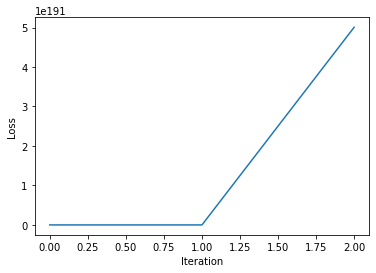

In [374]:
plt.plot(loss_list)
plt.xlabel('Iteration')
plt.ylabel('Loss')

plt.show()